In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import geopandas as gpd 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import sklearn
from sklearn import datasets, linear_model


In [2]:
def merge_Ind_Col(dataframe):
    '''
    Our data frame we read has many index columns and many headers and ti readh a data, a tuple required to reach it and this function merges and decrease the headder and index to one
    :param:dataframe: pandas.dataframe
    :return: rtn:  pandas.dataframe
    '''
    Update_col_names=[]
    for col in dataframe.columns:
        Update_col_names.append(' '.join(col))
    Update_index_names=[]
    for ind in dataframe.index:
        Update_index_names.append(' '.join(ind))
    b=dataframe.values[:,:]
    rtn=pd.DataFrame(b,columns=Update_col_names,index=Update_index_names)
    return rtn

In [3]:
census_data_table_5_4=pd.read_excel('../US_census//table05_4.xlsx',skiprows=4,skipfooter= 43,header=[0, 1,2],index_col=[0,1]).fillna(method='ffill')
census_data_table_5_4=merge_Ind_Col(census_data_table_5_4)
census_data_table_5_4.head()

c:\Users\mbagci\Anaconda3\envs\myenv\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Total population Unnamed: 2_level_1 Unnamed: 2_level_2,United States citizen Total Citizen Population Unnamed: 3_level_2,United States citizen Reported registered Number,United States citizen Reported registered Percent,United States citizen Reported not registered Number,United States citizen Reported not registered Percent,United States citizen No response to registration1 Number,United States citizen No response to registration1 Percent,United States citizen Reported voted Number,United States citizen Reported voted Percent,United States citizen Reported not voted Number,United States citizen Reported not voted Percent,United States citizen No response to voting2 Number,United States citizen No response to voting2 Percent,Total population Reported registered Percent,Total population Reported voted Percent
BOTH SEXES Total,81912.0,75590.0,57226.0,75.7,6725.0,8.9,11639.0,15.4,53646.0,71.0,10569.0,14.0,11376.0,15.0,69.9,65.5
BOTH SEXES Less than 9th grade,3168.0,1522.0,716.0,47.0,503.0,33.0,304.0,20.0,567.0,37.2,670.0,44.0,285.0,18.7,22.6,17.9
"BOTH SEXES 9th to 12th grade, no diploma",4344.0,3674.0,2036.0,55.4,957.0,26.1,680.0,18.5,1681.0,45.7,1401.0,38.1,592.0,16.1,46.9,38.7
BOTH SEXES High school graduate,23601.0,21738.0,14627.0,67.3,3186.0,14.7,3926.0,18.1,13205.0,60.7,4725.0,21.7,3808.0,17.5,62.0,55.9
BOTH SEXES Some college or associate's degree,21370.0,20581.0,16335.0,79.4,1240.0,6.0,3006.0,14.6,15414.0,74.9,2175.0,10.6,2992.0,14.5,76.4,72.1


(0.9886530664699162, 0.0014484751718225714)
[[0.08558974]]


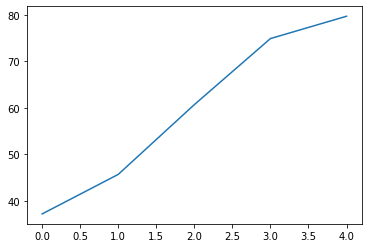

In [4]:
voting_per=census_data_table_5_4['United States citizen Reported voted Percent'][1:6].values
voting_num=census_data_table_5_4['United States citizen Reported voted Number'][1:6].values
plt.plot(voting_per)

print(pearsonr(census_data_table_5_4['United States citizen Reported voted Percent'][1:6],np.arange(1,6)))
regr = linear_model.LinearRegression()
# voting_per=voting_per-min(voting_per)
# voting_per=voting_per/max(voting_per)
# voting_per=voting_per*10

regr.fit(np.array(voting_per).reshape(-1, 1), np.array(range(1,6)).reshape(-1, 1))
print(regr.coef_)


In [5]:
plt.rcParams.update({'font.size': 32})


Text(0.5, 0, 'Voting Percentage')

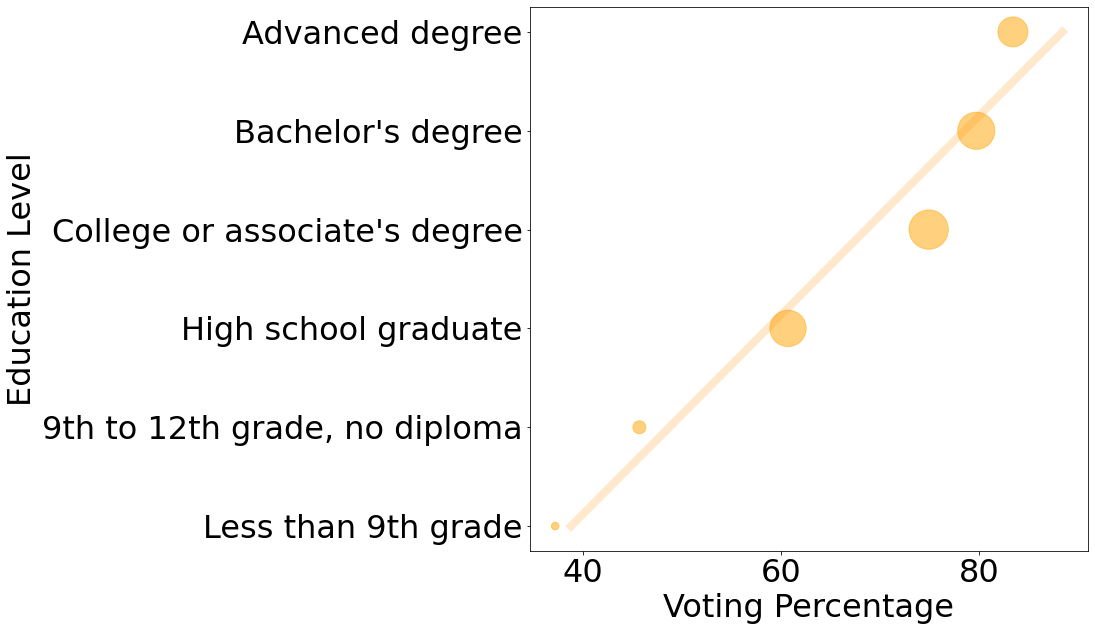

In [6]:
voting_per=census_data_table_5_4['United States citizen Reported voted Percent'][1:7].values
voting_num=census_data_table_5_4['United States citizen Reported voted Number'][1:7]

plt.figure(figsize=[10,10])
regr_inc = linear_model.LinearRegression()
regr_inc.fit(np.array(range(1,7)).reshape(-1, 1),voting_per.reshape(-1, 1))
pred_inc=regr_inc.predict(np.arange(1,7).reshape(-1, 1))
plt.plot(pred_inc,np.arange(6), linewidth=8,alpha=0.2,c='darkorange')
plt.rcParams.update({'font.size': 32})
x_values=['Less than 9th grade','9th to 12th grade, no diploma','High school graduate',"College or associate's degree","Bachelor's degree","Advanced degree"]
plt.scatter(voting_per,x_values,cmap='darkorange',s=voting_num/10,c='orange',alpha=0.5)

# plt.xticks(np.arange(1,10), x_values)

plt.ylabel('Education Level')
plt.xlabel("Voting Percentage")
